In [24]:
import os
import ipyvolume as ipv
from matplotlib import cm
from colorama import Fore
from scipy.interpolate import interp2d
import ipywidgets as widgets
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from pylab import rcParams

In [25]:
# def plot_p(ax, p, c='r'):
#     ax.scatter([p[0]], [p[1]], color=c, s=50);

def create_1D_plot(files_list, xmin, ymin, xmax=None, ymax=None, figname=None, min_value=None, max_value=None, array_name='Z_top1'):
    
#     clrs=['r','g','b','c','m','y','k']
    
    fig, ax = plt.subplots()
    for idx, data_path in enumerate(files_list):
        
        pkl = pickle.load(open(data_path[1], 'rb'))
        X = pkl['X']
        Z = pkl[array_name]
#         print(Z)

        best_point = pkl['best_point'] if 'best_point' in pkl.keys() else None

        if max_value: 
            Z[Z>max_value] = max_value

        if min_value: 
            Z[Z<min_value] = min_value

        if idx == 1:
            ax.plot(X,Z, marker="o",c='r', label=str(data_path[0]),linewidth=3)
        else:
            ax.plot(X,Z, marker="o", label=str(data_path[0]),linewidth=3)

    plt.legend(loc='lower right', fontsize=20)

    # Add title and axis names
    # plt.title('My title')
    plt.xlabel(r'$\Delta$/$\Delta$*', size=45)
    plt.ylabel('Accuracy (%)', fontsize=35)
    plt.tick_params(labelsize=25)
#     plt.show()
    if figname is not None:
        plt.savefig(figname)

In [26]:
# def plot_p(ax, p, c='r'):
#     ax.scatter([p[0]], [p[1]], color=c, s=50);

def create_1D_plot_v2(files_list, xmin, ymin, xmax=None, ymax=None, figname=None, min_value=None, max_value=None, array_name='Z_top1', every_idx=1, x_offset=0):
    
#     clrs=['r','g','b','c','m','y','k']
    
    fig, ax = plt.subplots()
    for idx, data_path in enumerate(files_list):
        
        pkl = pickle.load(open(data_path[1], 'rb'))
        X = pkl['X']
        x_min_idx = int(np.where(X>xmin)[0][0]) if xmin else 0
        x_max_idx = int(np.where(X>=xmax)[0][0]) if xmax else len(X)
#         print(x_min_idx)
#         print(x_max_idx)
        X = X[x_min_idx:x_max_idx]
        Z = pkl[array_name][x_min_idx:x_max_idx]
        X = X[::every_idx]-x_offset
        Z = Z[::every_idx]

        best_point = pkl['best_point'] if 'best_point' in pkl.keys() else None

        if max_value: 
            Z[Z>max_value] = max_value

        if min_value: 
            Z[Z<min_value] = min_value
        if idx == 1:
            ax.plot(X,Z, marker="o",c='r', label=str(data_path[0]),linewidth=3)
        else:
            ax.plot(X,Z, marker="o", label=str(data_path[0]),linewidth=3)

#     plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.,fontsize=22)

    plt.legend(loc='lower right', fontsize=20)
    plt.ylim((0, 80))
    plt.xlabel(r'$\Delta$/$\~\Delta$', size=40)
    plt.ylabel('Accuracy (%)', fontsize=35)
    plt.tick_params(labelsize=25)
#     plt.show()
    if figname is not None:
        plt.savefig(figname)

The effect of KURE on ResNet-18 accuracy with PTQ setting.
Uniformization of the model (k = 1.8) provides higher accuracy.

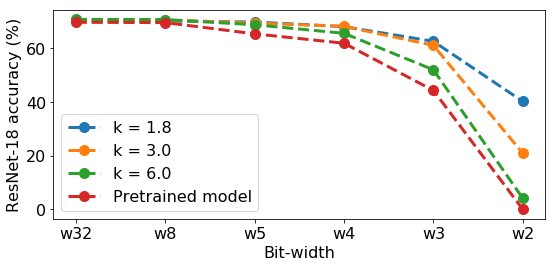

In [27]:
bit_width = ['w2','w3','w4','w5','w8','w32']
kurtosis_acc_dict = {}
kurtosis_acc_dict['k = 1.8'] = [40.2,62.6,68.1,69.8,70.2,70.3]
kurtosis_acc_dict['k = 3.0'] = [20.9, 61.1, 68.2, 69.4, 70.6, 70.6]
kurtosis_acc_dict['k = 4.0'] = [7.5,58.8,66.3,69.3,70.6,70.7]
kurtosis_acc_dict['k = 6.0'] = [4.1,52.0,65.6,68.8,70.7,70.8]
kurtosis_acc_dict['Pretrained model'] = [0,44.3,61.9,65.4,69.6,69.7]

clrs=['r','y','b','g','m','k']
rcParams['figure.figsize'] = 8, 4
font = {'size': 16, 'weight': 'normal'}
matplotlib.rc('font', **font)

plt.figure()
k_list = ['k = 1.8', 'k = 3.0' ,'k = 6.0' ,'Pretrained model']
for idx, k in enumerate(k_list):
    acc_list = kurtosis_acc_dict[k]
    plt.plot(bit_width[::-1], acc_list[::-1],'--',marker='o',markersize=10, label=k,linewidth=3.0)

plt.xlabel('Bit-width', fontsize=16)
plt.ylabel('ResNet-18 accuracy (%)', fontsize=16)
plt.tick_params(labelsize=16)
plt.legend()

plt.tight_layout()
figname = "../data/fig/kurtosis_val_vs_resnet18_accuracy_for_different_bit_width_for_paper_1.pdf"
if figname is not None:
    plt.savefig(figname, bbox_inches='tight')

## Robustness towards variations in quantization step size

The network has been optimized for quantization step size $\Delta^*$. Still, the quantizer uses a slightly different step size $\Delta$. Small changes in optimal step size $\Delta^*$ cause severe accuracy degradation in the quantized model. KURE significantly enhances the model robustness by promoting solutions that are more robust to uncertainties in the quantizer design (ResNet-18 and MobileNet-V2 on ImageNet).

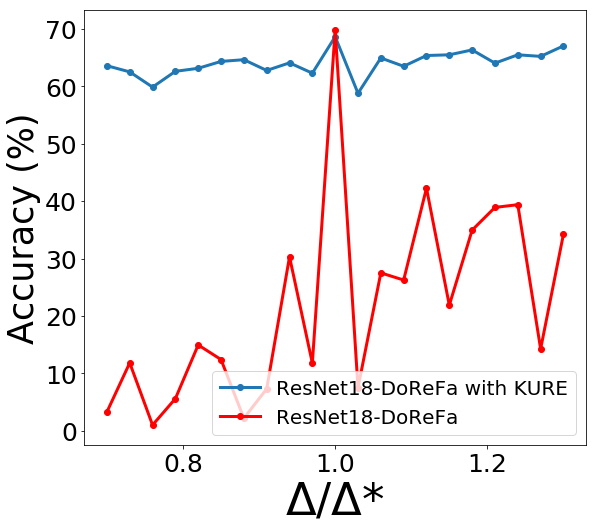

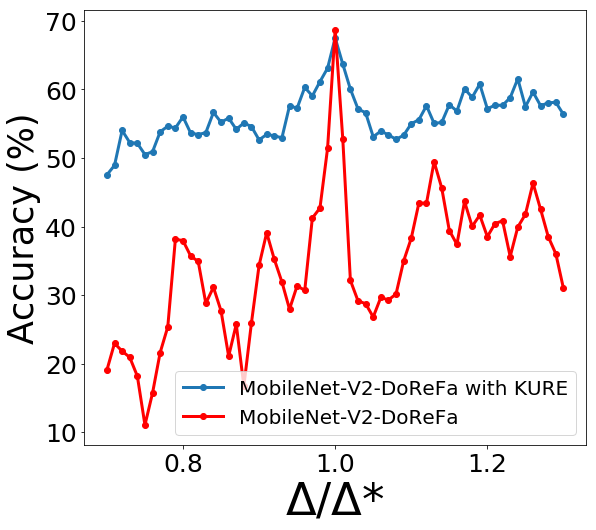

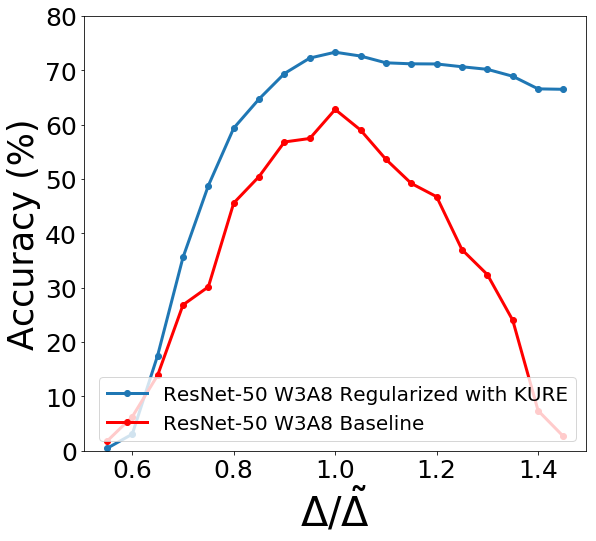

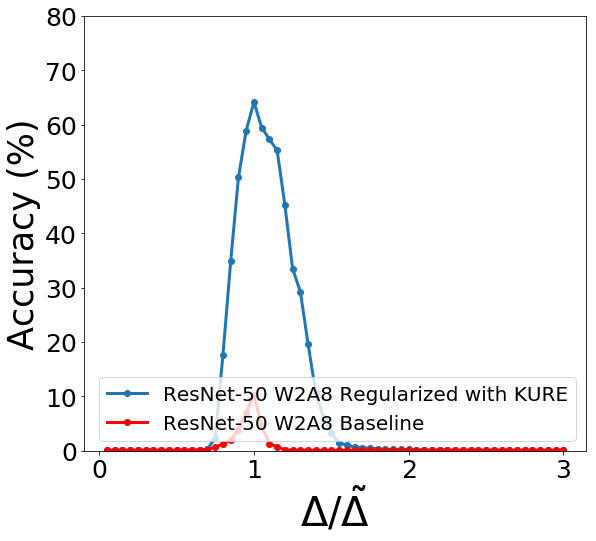

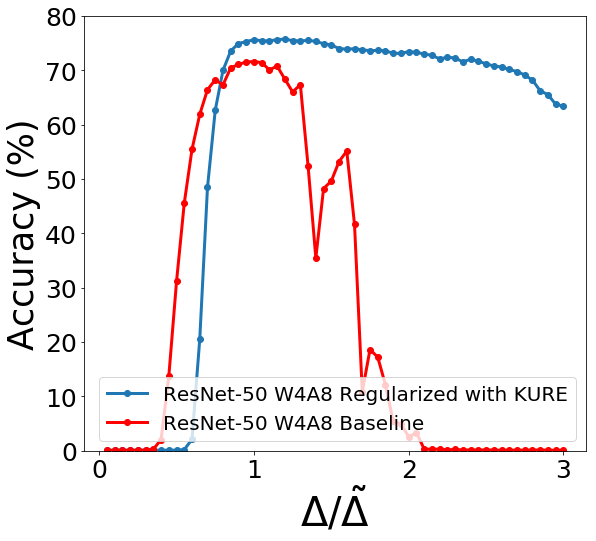

In [31]:
rcParams['figure.figsize'] = 9, 8
font = {'size': 25, 'weight': 'normal'}
matplotlib.rc('font', **font)

# resnet-18
files_list = []
files_list.append(('ResNet18-DoReFa with KURE','../data/qat_w4_kreg_2019.11.19-094805_AllWeights_ratio_scale_1D_grid_loss_acc/resnet18_WALLANoneMINR0.7_MAXR1.3_GR21.pkl'))
files_list.append(('ResNet18-DoReFa','../data/qat_w4_2019.11.13-092130_AllWeights_ratio_scale_1D_grid_loss_acc/resnet18_WALLANoneMINR0.7_MAXR1.3_GR21.pkl'))


create_1D_plot(files_list, 0.5, 0.5, 1.5, 1.5, min_value=None, max_value=None, array_name='Z_top1', figname = "../data/fig/qat_dorefa_sensitivity_resnet18_accu_for_different_scale_ratio.pdf")

# mobilenet-v2
files_list = []
files_list.append(('MobileNet-V2-DoReFa with KURE','../data/mobilenet_v2_qat_w4_2020.01.08-095140_AllWeights_ratio_scale_1D_grid_loss_acc_b/mobilenet_v2_WALLANoneMINR0.7_MAXR1.3_GR61_BCWTT.pkl'))
files_list.append(('MobileNet-V2-DoReFa','../data/mobilenet_v2_qat_w4_kreg_2020.01.08-095127_AllWeights_ratio_scale_1D_grid_loss_accoss_acc_b/mobilenet_v2_WALLANoneMINR0.7_MAXR1.3_GR61_BCWTT.pkl'))


create_1D_plot(files_list, 0.5, 0.5, 1.5, 1.5, min_value=None, max_value=None, array_name='Z_top1', figname = "../data/fig/qat_dorefa_sensitivity_mobilenet_v2_accu_for_different_scale_ratio.pdf")


# Post Training ResNet-50 W3
files_list = []
files_list.append(('ResNet-50 W3A8 Regularized with KURE','../data/resnet50_k_1.8_w3_lapq_bcw_loss_generation_gr60/loss_generation_lapq_resnet50_WALLANone.pkl'))
files_list.append(('ResNet-50 W3A8 Baseline','../data/resnet50_pretrained_w3_lapq_bcw_loss_generation_gr60/loss_generation_lapq_resnet50_WALLANone.pkl'))


# create_1D_plot_v2(files_list, 0.7, None, 3.0, None, min_value=None, max_value=None, array_name='Z_top1', figname = "../data/fig/ptq_sesitivity_lp2_resnet50_w3.pdf", every_idx=1)
create_1D_plot_v2(files_list, 0.5, None, 1.5, None, min_value=None, max_value=None, array_name='Z_top1', figname = "../data/fig/ptq_sesitivity_lapq_resnet50_w3.pdf", every_idx=1, x_offset=0.0)

# Post Training ResNet-50 W2
files_list = []
files_list.append(('ResNet-50 W2A8 Regularized with KURE','../data/resnet50_k_1.8_w2_lapq_bcw_loss_generation_gr60/loss_generation_lapq_resnet50_WALLANone.pkl'))
files_list.append(('ResNet-50 W2A8 Baseline','../data/resnet50_pretrained_w2_lapq_bcw_loss_generation_gr60/loss_generation_lapq_resnet50_WALLANone.pkl'))


# create_1D_plot_v2(files_list, 0.7, None, 3.0, None, min_value=None, max_value=None, array_name='Z_top1', figname = "../data/fig/ptq_sesitivity_lp2_resnet50_w3.pdf", every_idx=1)
create_1D_plot_v2(files_list, None, None, None, None, min_value=None, max_value=None, array_name='Z_top1', figname = "../data/fig/ptq_sesitivity_lapq_resnet50_w2.pdf", every_idx=1, x_offset=0.0)


# Post Training ResNet-50 W4
files_list = []
files_list.append(('ResNet-50 W4A8 Regularized with KURE','../data/resnet50_k_1.8_w4_lapq_bcw_loss_generation_gr60/loss_generation_lapq_resnet50_WALLANone.pkl'))
files_list.append(('ResNet-50 W4A8 Baseline','../data/resnet50_pretrained_w4_lapq_bcw_loss_generation_gr60/loss_generation_lapq_resnet50_WALLANone.pkl'))

create_1D_plot_v2(files_list, None, None, None, None, min_value=None, max_value=None, array_name='Z_top1', figname = "../data/fig/ptq_sesitivity_lapq_resnet50_w4.pdf", every_idx=1)


## Robustness towards variations in quantization bit-width

KURE impact on model accuracy when using PTQ quantization method (ResNet-18, ResNet-50 and MobileNet-V2 with ImageNetdata-set) 

In [23]:
import pandas as pd
data = {'ResNet-50; no regularization':   [76.1, 71.8, 62.9, 10.3, 74.8, 72.9, 70, 38.4], 
        'ResNet-50; KURE regularization': [76.3, 75.6, 73.6, 64.2, 76.2, 75.8, 74.3, 66.5], 
        'ResNet-18; no regularization':   [69.7, 62.6, 52.4, 0.5, 68.6, 65.4, 59.8, 44.3], 
        'ResNet-18; KURE regularization': [70.3, 68.3, 62.6, 40.2, 70, 69.7, 66.9, 57.3], 
        'MobileNet-V2; no regularization': [71.8, 60.4, 31.8, None , 69.7, 64.6, 48.1, 3.7 ],
        'MobileNet-V2; KURE regularization': [71.4, 67.6, 56.6,None , 70, 66.9, 59, 24.4]}
pd = pd.DataFrame.from_dict(data, orient='index', columns=['FP', '4/FP', '3/FP', '2/FP', '6/6', '5/5', '4/4','3/3'])
pd.loc[['ResNet-50; no regularization', 'ResNet-50; KURE regularization', 'ResNet-18; no regularization', 'ResNet-18; KURE regularization', 'MobileNet-V2; no regularization', 'MobileNet-V2; KURE regularization']]

,FP,4/FP,3/FP,2/FP,6/6,5/5,4/4,3/3
ResNet-50; no regularization,76.1,71.8,62.9,10.3,74.8,72.9,70.0,38.4
ResNet-50; KURE regularization,76.3,75.6,73.6,64.2,76.2,75.8,74.3,66.5
ResNet-18; no regularization,69.7,62.6,52.4,0.5,68.6,65.4,59.8,44.3
ResNet-18; KURE regularization,70.3,68.3,62.6,40.2,70.0,69.7,66.9,57.3
MobileNet-V2; no regularization,71.8,60.4,31.8,NaN,69.7,64.6,48.1,3.7
MobileNet-V2; KURE regularization,71.4,67.6,56.6,NaN,70.0,66.9,59.0,24.4
